# Create Training Data Statistics for OpenScale Monitoring

This notebook can be used to generate the training data statistics JSON file that is used during OpenScale configuration.  To run this notebook, you will need to have access to the model training data (either as flat file, or through a DB connection).  To start, be sure that ibm_watson_openscale is upgraded to the latest version by running the pip install command below.  

In [1]:
#!pip install --upgrade ibm_watson_openscale

In [2]:
#import packages
import pandas as pd
from ibm_watson_openscale.utils.training_stats import TrainingStats

## User-Defined Inputs

Fill in the information below (path to your training data (if in csv format), desired output filename/path for the final JSON file, model type ('binary', 'regression'), and the name of the label column)

#### Add the path of your "Airline_Virtualized_Data_Grp_number" dataset
- Go to the `Find and add data` icon, go to "Airline_Virtualized_Data_Grp_number.csv" dataset
- Select 'Insert to code' and then click on 'pandas Dataframe' as given in the screenshot below

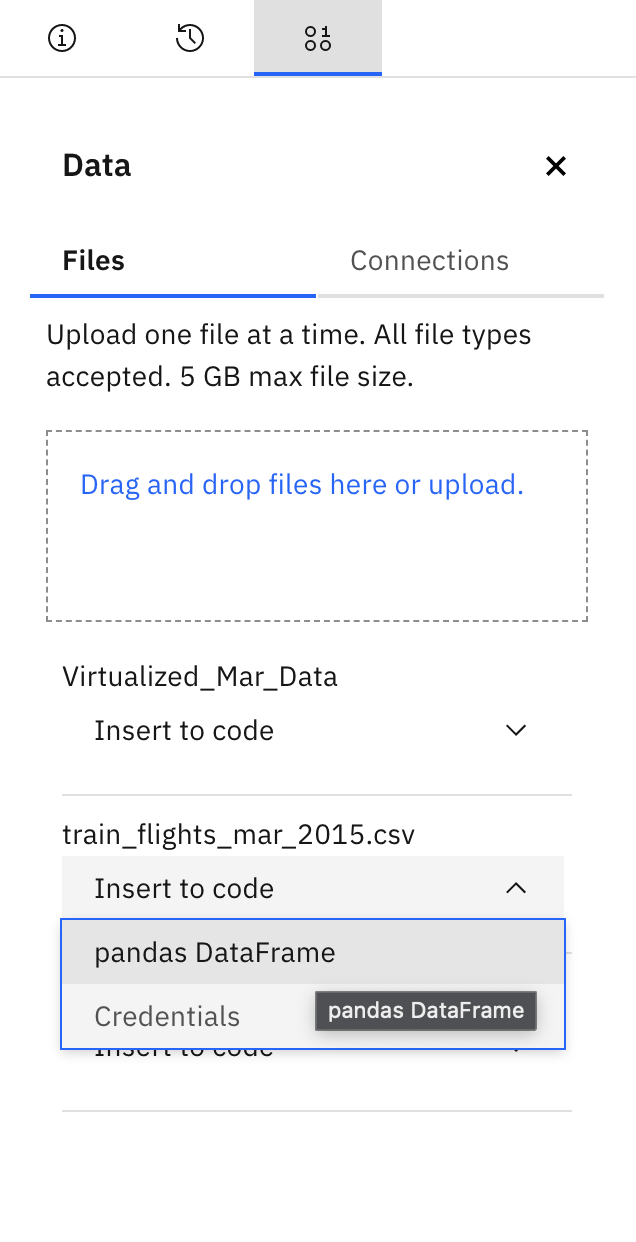

<br>

#### This will add the path of your dataset as given in the cell below

In [9]:
training_data_filepath = "/project_data/data_asset/Airline_Virtualized_Data_Grp_number_csv_1ev8vmlhh3wga43246hgfq3dc"
training_stats_output_filepath = "/project_data/data_asset/training_stats.json"
model_type = "binary" # 'regression' for regression models
label_column = "DELAYED"

## Read Training Data

Note: if training data is not in csv format (e.g. in a database) adjust the code below to read from source. 

In [10]:
df = pd.read_csv(training_data_filepath)
df.head()

,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,DELAYED
0,23,5,MSP,PHX,-2.0,13.0,1276,0
1,2,5,RAP,SLC,-6.0,32.0,508,0
2,8,4,STX,MIA,-5.0,9.0,1139,0
3,16,5,CLT,ATL,6.0,14.0,226,0
4,11,7,ATL,BDL,0.0,18.0,859,0


## Specify Training Data Features 

To generate training data statistics, openscale needs to know all of the features in the model, and specifically which ones are categorical.  We specify this below (in this case, all of the features are categorical): 

In [26]:
categorical_columns = ["ORIGIN_AIRPORT","DESTINATION_AIRPORT","DAY_OF_WEEK","DAY"]

In [27]:
feature_cols = list(df.columns)
feature_cols.remove(label_column)

## Configure Fairness 

Define threshold to monitor for fairness (disparate impact ratio), and declare which features to monitor for fairness, which groups to specifically monitor, and which outcome to consider favorable.

In [28]:
FAIRNESS_THRESHOLD = .98

In [33]:

fairness_inputs = {
    "fairness_attributes": [
        {"feature": "DAY_OF_WEEK",
         "majority": [[1,2]],
         "minority": [[3,7]],
         "threshold": FAIRNESS_THRESHOLD
         }
    ],
    "favourable_class": [1],
    "unfavourable_class": [0],
    "min_records": 100
}
    
input_parameters = {
    "label_column": label_column,
    "feature_columns": feature_cols,
    "categorical_columns": categorical_columns,
    "fairness_inputs": fairness_inputs,  
    "problem_type" : model_type
}

## Generate Training Data Statistics

In [34]:
training_stats = TrainingStats(df, input_parameters, explain=True, fairness=True, drop_na=True)
training_stats_json = training_stats.get_training_statistics()

## Store Training Data Statistics as JSON

In [35]:
import json
file_path = training_stats_output_filepath
with open(file_path, 'w') as fp:
    json.dump(training_stats_json, fp)

### Publish `training_stats.json` file to Model_Catalog_`GroupNumber` Catalog

The previous step saved a `training_stats.json` file in the "Airlines-MLops-`GroupNumber`" project. 

<br>

<b> <i> Note: Download this file on your system locally by clicking on the `three vertical dots` icon and selecting `Download`. This file will be used in future notebook when configuring the model in OpenScale</i> </b> 

<br>

Publish this file into your "Model_Catalog_`GroupNumber`" catalog. 

- Go to the `Navigation Menu` -> `Projects` -> `All Projects`
- Open "Airlines-MLops-`GroupNumber`" project
- Go to the `Data Assets` section under the `Assets` tab 
- Cick on the "three vertical dots" icon next to the `training_stats.json` file and select `Publish to Catalog` as given in the screenshot below


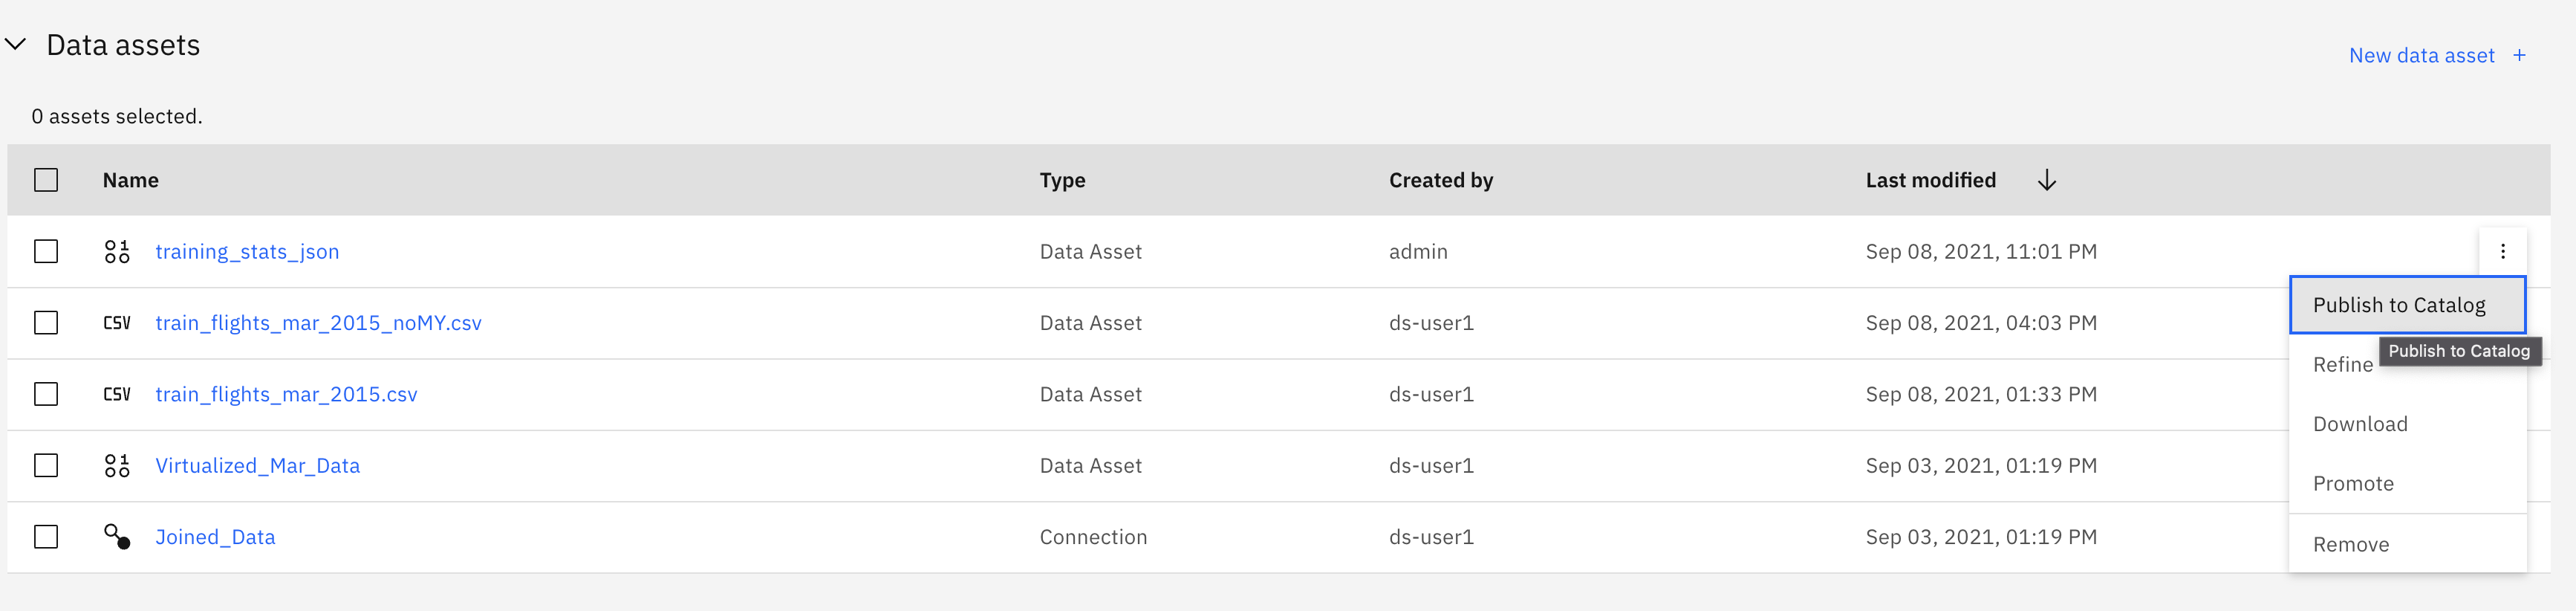

Once the asset is loaded, You will be able to see the `training_stats.json` file as a Data Asset in the `Browse Assets` section of the "Model_Catalog_`GroupNumber`" Catalog
